Trying Out DefiLlama API to get TVL and Volume information

In [1]:
from defillama import DefiLlama
import pandas as pd

import pandas as pd
import copy
import time
from datetime import datetime as dt
from matplotlib import pyplot as plt



In [2]:
# Create a DeFiLlama object
llama  = DefiLlama()

# # Get all protocols data
# response = llama.get_all_protocols()

# # Get a protocol data
# response = llama.get_protocol(name='Bitcoin')
# response

# # # Get historical values of total TVL
# response = llama.get_historical_tvl()
# response

# # # Get protocol TVL
# response = llama.get_tvl(name='Bitcoin')
# response

all_protocols = llama.get_all_protocols()
df = pd.DataFrame(all_protocols)
df.columns

Index(['id', 'name', 'address', 'symbol', 'url', 'description', 'chain',
       'logo', 'audits', 'audit_note', 'gecko_id', 'cmcId', 'category',
       'chains', 'module', 'twitter', 'forkedFrom', 'oracles', 'listedAt',
       'slug', 'tvl', 'chainTvls', 'change_1h', 'change_1d', 'change_7d',
       'tokenBreakdowns', 'mcap', 'referralUrl', 'treasury', 'audit_links',
       'openSource', 'governanceID', 'github', 'stablecoins', 'parentProtocol',
       'wrongLiquidity', 'staking', 'pool2', 'language', 'assetToken',
       'oraclesByChain', 'deadUrl', 'rugged'],
      dtype='object')

In [3]:
labels = ['id', 'url', 'description', 'logo', 'audits', 'audit_note', 'gecko_id', 'cmcId', 'module', 'twitter', 'audit_links', 'oracles', 'language', 'slug', 'openSource', 'pool2', 'forkedFrom', 'listedAt']
df.drop(labels=labels, axis=1, inplace=True)

# Sort values based on market cap in descending order
df.sort_values(by='mcap', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,name,address,symbol,chain,category,chains,tvl,chainTvls,change_1h,change_1d,...,governanceID,github,stablecoins,parentProtocol,wrongLiquidity,staking,assetToken,oraclesByChain,deadUrl,rugged
0,Bitcoin,None,BTC,Bitcoin,Chain,[Bitcoin],0.000000e+00,{'Bitcoin': 0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Polygon Bridge & Staking,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,MATIC,Polygon,Chain,[Polygon],4.909488e+09,{'Polygon': 4909488242.495735},-0.177049,-1.223079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Avalanche,,AVAX,Avalanche,Services,[Avalanche],0.000000e+00,{'Avalanche': 0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]",1.463548e+10,"{'Ethereum': 14581095580.960495, 'Moonriver': ...",-0.354999,-1.151359,...,[snapshot:lido-snapshot.eth],[lidofinance],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Defi Swap,0xa0b73e1ff0b80914ab6fe0444e65848c4c34450b,CRO,Ethereum,Dexes,[Ethereum],1.922794e+06,{'Ethereum': 1922794.100237837},-0.270551,-1.279241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aptos,None,APT,Aptos,Chain,[Aptos],0.000000e+00,{'Aptos': 0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arbitrum,None,ARB,Arbitrum,Chain,[Arbitrum],0.000000e+00,{'Arbitrum': 0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NEAR,None,-,Near,Chain,[Near],0.000000e+00,{'Near': 0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MakerDAO,0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2,MKR,Ethereum,CDP,[Ethereum],5.226128e+09,{'Ethereum': 5226127513.529199},-0.225163,-1.870020,...,NaN,[makerdao],[dai],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AAVE V2,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]",2.442766e+09,"{'pool2': 83448445.43432768, 'Polygon-borrowed...",-0.308785,-1.930873,...,NaN,NaN,NaN,parent#aave,True,1.670360e+08,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='mcap'>

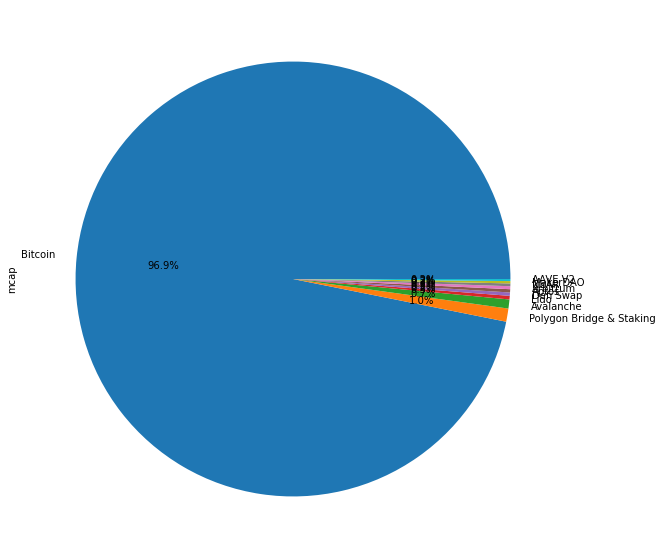

In [4]:
# Creating subset of the dataframe
plot_data = df[['name', 'mcap']][:10]
plot_data.set_index(keys='name', inplace=True)
plot_data.plot(x='name', y='mcap', kind='pie', figsize=(10, 10), legend=False, autopct='%1.1f%%')

In [5]:
protocols = list(df['name'][:10])
protocols = [item.replace(' ', '-').lower() for item in protocols]

In [6]:
# Setting number of days for data slicing
days = 120
df = pd.DataFrame()
for protocol in protocols:
   response = llama.get_protocol(protocol)
   # Obtaining TVL values from the response data
   response = response['tvl']
   # Reversing the list to set descendiong order of date
   response.reverse()
   # Creating column 'date' only once
   if 'date' not in df:
      df['date'] = pd.Series([response[idx]['date'] for idx in range(days) if idx <= len(response)-1])
      df['date'] = pd.to_datetime(df['date'],unit='s')
      
   df[protocol] = pd.Series([response[idx]['totalLiquidityUSD'] for idx in range(days) if idx <= len(response)-1])
df.sort_values(by='date', ascending=False, inplace=True)
df.set_index(keys='date', drop=True, inplace=True)
df.fillna(value=0, axis=1, inplace=True)
df.head()

,bitcoin,polygon-bridge-&-staking,avalanche,lido,defi-swap,aptos,arbitrum,near,makerdao,aave-v2
date,,,,,,,,,,
2023-08-31 01:02:11,0,4.909488e+09,0.0,1.463548e+10,1.922794e+06,0,0,0.0,5.226128e+09,2.442766e+09
2023-08-31 00:00:00,0,4.918196e+09,0.0,1.468762e+10,1.928010e+06,0,0,0.0,5.237921e+09,2.450333e+09
2023-08-30 00:00:00,0,5.008809e+09,0.0,1.487551e+10,1.955631e+06,0,0,0.0,5.345261e+09,2.495642e+09
2023-08-29 00:00:00,0,4.822571e+09,0.0,1.412027e+10,1.906619e+06,0,0,0.0,5.156995e+09,2.449626e+09
2023-08-28 00:00:00,0,4.783805e+09,0.0,1.405100e+10,1.894896e+06,0,0,0.0,5.171358e+09,2.450991e+09


array([[<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>]],
      dtype=object)

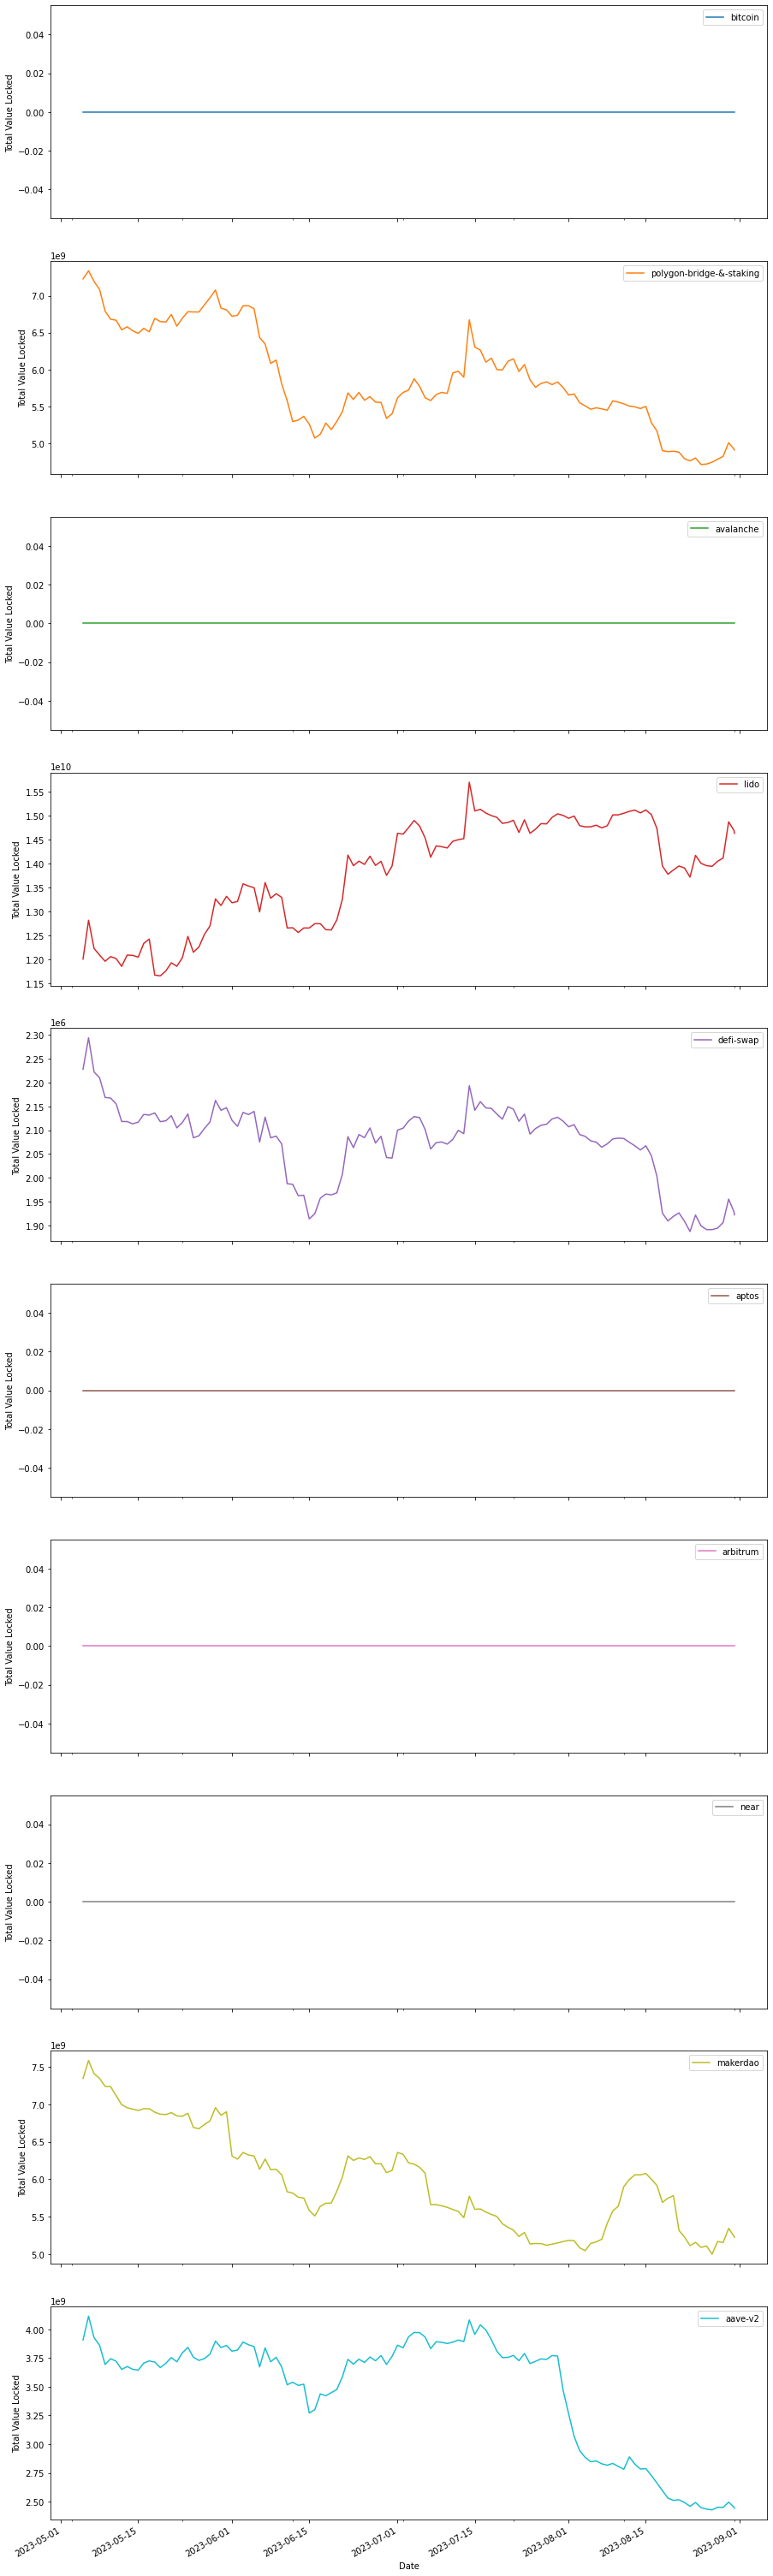

In [7]:
df.plot(subplots=True, layout=(10, 1), figsize=(15, 60), xlabel='Date', ylabel='Total Value Locked')

Method 2 - Using requests

In [2]:
import requests

# Define a custom method and timeout for the API request
method = "GET"  # or "POST" or other HTTP methods, depending on the API endpoint
timeout = 10  # in seconds, specify the desired timeout value

# Set the endpoint URL for the API to get TVL for all chains
url = "https://api.llama.fi/chains"

# Make the request to the API with the custom method and timeout
response = requests.request(method, url, timeout=timeout)

# Check the response status code
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()

# Convert dictionary to a DataFrame
df = pd.DataFrame(data)
# Set float format to display all numbers without scientific notation
pd.options.display.float_format = '{:.3f}'.format
df.head(20)

,gecko_id,tvl,tokenSymbol,cmcId,name,chainId
0,arbitrum,1945048818.683,ARB,11841,Arbitrum,42161
1,ethereum,51031872247.053,ETH,1027,Ethereum,1
2,optimism,801775362.234,OP,11840,Optimism,10
3,kava,292526103.448,KAVA,4846,Kava,None
4,harmony,2464361.655,ONE,3945,Harmony,1666600000
5,moonbeam,40695485.821,GLMR,6836,Moonbeam,1284
6,aurora-near,12267766.678,AURORA,14803,Aurora,1313161554
7,gnosis,71996884.799,GNO,1659,xDai,100
8,avalanche-2,677274265.066,AVAX,5805,Avalanche,43114
9,matic-network,964069246.598,MATIC,3890,Polygon,137


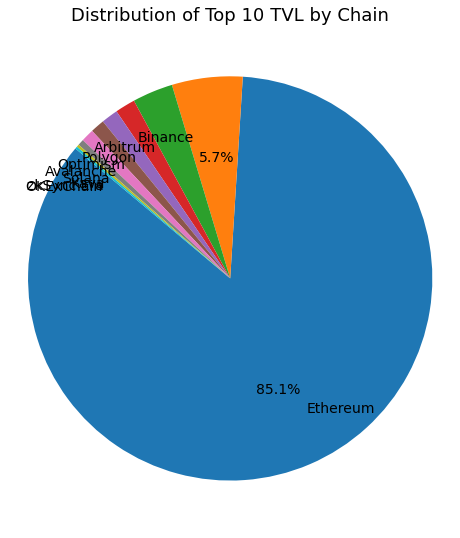

In [42]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
top20_tvl = df.head(20)

# Sorting the data by TVL
top20_tvl = top20_tvl.sort_values(by='tvl', ascending=False)

# Selecting the top 6 rows
top6_tvl = top20_tvl.head(10)

# Plotting
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top6_tvl['tvl'], labels=top6_tvl['name'],
                                    autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '',
                                    startangle=140, labeldistance=0.7, textprops={'fontsize': 14})

# Customization: Set title and font size
plt.title('Distribution of Top 20 TVL by Chain', fontsize=18)
plt.subplots_adjust(top=1)  # Increase the 'top' value

# Adjusting label positions
for text, autotext in zip(texts, autotexts):
    x, y = text.get_position()
    if x >= 0:
        x += 0.1
    else:
        x -= 0.1
    text.set_position((x, y))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


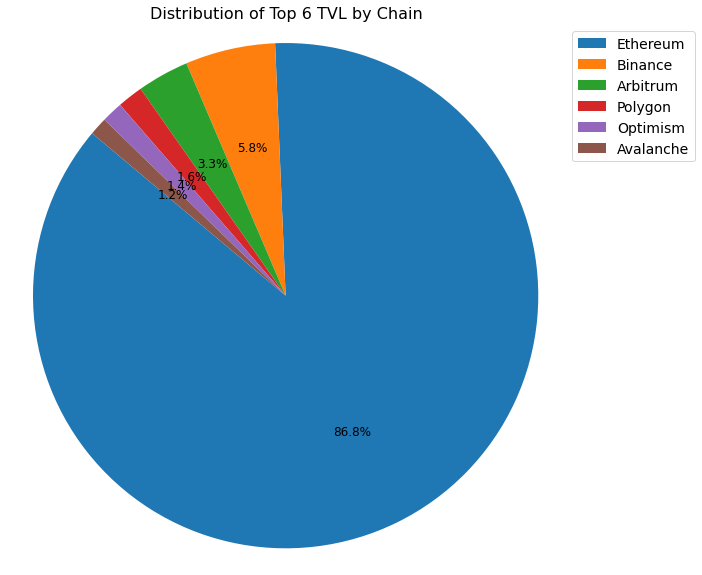

In [64]:
# Sorting the data by TVL
top20_tvl = top20_tvl.sort_values(by='tvl', ascending=False)

# Selecting the top 6 rows
top6_tvl = top20_tvl.head(6)

# Plotting
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(top6_tvl['tvl'],
                                    autopct=lambda p: '{:.1f}%'.format(p) ,
                                    startangle=140, labeldistance=0.7, textprops={'fontsize': 12})

# Customization: Set title and font size
plt.title('Distribution of Top 6 TVL by Chain', fontsize=16)

# Create a larger color legend on the side
legend = plt.legend(labels=top6_tvl['name'], loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})

# Set legend title if needed
# legend.set_title('Legend Title', prop={'size': 14})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
